# Project Title: The Impact of News on the Market
### •	Team Members:
##### 	Rachel Torres, Christian Attard, Jess Alcalde, Nitin Khade
### •	Project Description/Outline:
##### -	We will look at news data and stock data to determine the effects of the news on how the market behaves.
### •	Research Questions to Answer:
##### -	How do news headlines affect the stock market?
##### -	Is there any correlation between certain types of headlines and effects on the market?
##### -	Does negative news affect stocks greater than positive or neutral?
##### -	Can we assign a factor(weighting) to it?

In [1]:
# import dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

from news_api import api_key
from x_api import x_api_key

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

# Rather than rewriting code multiple times, we've created a function to call the news API and output data into a dataframe
# preliminary work is in older notebook
from news_pull import sentiment_scores
from news_pull import news_pull

### We'll query the news api to gather news headlines from the web

In [2]:
# Create newDF for general market (S&P & Nasdaq)
genNews = news_pull('News')

 There are 27 pages, with 1336 total articles.
  datePublished                                        description  \
0    06/30/2019  Quite a few new laws will be implemented in Ge...   
1    06/28/2019  Watch New movies reviews: Yesterday, Euphoria ...   
2    06/28/2019  Find and research the best new cars, get best ...   
3    06/27/2019  International Business News: "Additional tarif...   
4    06/26/2019  WALLENPAUPACK- Rain clouds past, sunshine retu...   

                                            keywords     provider  \
0   s will take effect july 1,new georgia laws,these  forsythnews   
1                       new movie,yesterday,s videos   globalnews   
2                  car reviews,roadshow,new car,cnet         cnet   
3    on new tariffs,s on china,trump s,s news,donald   indiatimes   
4  new chapter opens,s for wahs,s of 2019,s class...       neagle   

                                               title  \
0     These new Georgia laws will take effect July 1   
1  Ne

In [3]:
# Create newsDF for Wayfair
WayFairNews = news_pull('Wayfair News')

 There are 30 pages, with 1502 total articles.
  datePublished                                        description  \
0    06/27/2019  The protest triggered a broader backlash again...   
1    06/27/2019  Employees at online home furnishings retailer ...   
2    06/26/2019  Wayfair workers walk out to protest U.S. migra...   
3    06/26/2019  Catch up on the most important news from today...   
4    06/26/2019  BOSTON (AP) - Employees at online home furnish...   

                                           keywords      provider  \
0  wayfair workers walk out,lakeland,protest,ledger     theledger   
1            detention center,wayfair,protest,texas          wthr   
2            wayfair workers walk out,one news page   onenewspage   
3   facebook data value,wayfair walkout,boston,news         wired   
4         wayfair employees,detention center,boston  mysanantonio   

                                               title  \
0  Wayfair workers walk out to protest $200,000 s...   
1  Wa

In [4]:
# Create newsDF for Wells Fargo
WellsFargoNews = news_pull('Wells Fargo News')

 There are 45 pages, with 2234 total articles.
  datePublished                                        description  \
0    03/29/2019  Wells Fargo news today about company President...   
1    07/01/2019  Research Analysts updated eps estimates for Mo...   
2    06/27/2019  The Western Albemarle Athletics Department won...   
3    06/24/2019  Be the first to get all the important details ...   
4    06/21/2019  A text scam is making the rounds to Utah consu...   

                                            keywords             provider  \
0           wells fargo news,ceo tim sloan,president        investorplace   
1        updated eps estimates,wells fargo,nyse agco  americanbankingnews   
2  western albemarle,wells fargo cup,department,s...                nbc29   
3            wells fargo center,whp 580,news,2019,pm                whptv   
4  utah consumers,s targeted by,s fargo bank,text...          deseretnews   

                                               title  \
0  Wells Farg

In [5]:
# Create newsDF for Tesla
TeslaNews = news_pull('Tesla News')

 There are 46 pages, with 2308 total articles.
  datePublished                                        description  \
0    06/29/2019  All eyes are on the Model 3 as the new vehicle...   
1    06/25/2019  This Electrek app provides you with articles r...   
2    06/12/2019  TESLA CEO is one step closer to becoming a rea...   
3    05/17/2019  In the latest Tesla news, TSLA stock is sinkin...   
4    02/28/2019  The billionaire has a surprise up his sleeve f...   

                                            keywords       provider  \
0                  can model 3 deliveries,tesla news        ibtimes   
1                 technology,electrek,services,tesla          zdnet   
2                       tesla news,science,james,car        express   
3                              tesla model,autopilot  investorplace   
4  reveal big tesla news,metro news,elon musk,twi...          metro   

                                               title  \
0    Tesla News: Can Model 3 Deliveries Keep Risi

In [6]:
# Create newsDF for Political News
PoliNews = news_pull('Political News')

 There are 38 pages, with 1925 total articles.
  datePublished                                        description  \
0    07/02/2019        Music, Film, TV and Political News Coverage   
1    07/01/2019  Gen Z's go-to source for political news is Ins...   
2    06/29/2019  Lawmakers seeking to slap gambling-addiction w...   
3    06/28/2019  The Supreme Court will decide whether Presiden...   
4    06/24/2019  Saturday night, WJTV launched it's new weekly ...   

                                            keywords           provider  \
0                    rolling stone,political,film,tv       rollingstone   
1      business insider india,political news,gen,ist    businessinsider   
2   lottery tickets,political news,warnings,desantis  sunshinestatenews   
3              president donald trump,political news               wthr   
4  new weekly political program,mississippi polit...       yallpolitics   

                                               title  \
0  Taylor Swift, Scooter 

In [7]:
# Create newsDF for Financial News
FinNews = news_pull('Financial News')

 There are 29 pages, with 1472 total articles.
  datePublished                                        description  \
0    07/02/2019  The "Fast Money" traders share their final tra...   
1    06/29/2019  MarketWatch provides the latest stock market, ...   
2    06/20/2019  THE BUSINESS TIMES - Find latest business & fi...   
3    06/19/2019  How is financial news like a crying baby? Robe...   
4    06/12/2019  The Street, the financial news company started...   

                                            keywords       provider  \
0                financial news,business,quotes,data           cnbc   
1       stock market news,financial news,marketwatch    marketwatch   
2         business times,financial news,videos,house  businesstimes   
3  cfa institute enterprising investor,financial ...   cfainstitute   
4  street has agreed to sell,financial news compa...         nypost   

                                               title  \
0                    Final Trade: KO, STZ, TJX & 

In [8]:
import pandas as pd

In [9]:
# import stock data
nasdaq_data = "nasdaq.csv"
nasdaq_df = pd.read_csv(nasdaq_data)


sp500_data = "sp500.csv"
sp500_df = pd.read_csv(sp500_data)
sp500_df.head()

# Load stock data into notebook as dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2018,2727.129883,2743.260010,2718.030029,2718.370117,2718.370117,3565620000
1,7/2/2018,2704.949951,2727.260010,2698.949951,2726.709961,2726.709961,3073650000
2,7/3/2018,2733.270020,2736.580078,2711.159912,2713.219971,2713.219971,1911470000
3,7/5/2018,2724.189941,2737.830078,2716.020020,2736.610107,2736.610107,2953420000
4,7/6/2018,2737.679932,2764.409912,2733.520020,2759.820068,2759.820068,2554780000


In [10]:
nasdaq_df.insert(0, 'Index', 'Nasdaq')
nasdaq_df.head()

sp500_df.insert(0, 'Index', 'S&P 500')
sp500_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,S&P 500,6/29/2018,2727.129883,2743.260010,2718.030029,2718.370117,2718.370117,3565620000
1,S&P 500,7/2/2018,2704.949951,2727.260010,2698.949951,2726.709961,2726.709961,3073650000
2,S&P 500,7/3/2018,2733.270020,2736.580078,2711.159912,2713.219971,2713.219971,1911470000
3,S&P 500,7/5/2018,2724.189941,2737.830078,2716.020020,2736.610107,2736.610107,2953420000
4,S&P 500,7/6/2018,2737.679932,2764.409912,2733.520020,2759.820068,2759.820068,2554780000


In [120]:
# Merge 2 DataFrames
stock_df = pd.concat([sp500_df, nasdaq_df], ignore_index=True)

#sort by date
stock_df = stock_df.sort_values(by=['Date'])
stock_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
133,S&P 500,1/10/2019,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000
385,Nasdaq,1/10/2019,6908.649902,6991.370117,6877.080078,6986.069824,6986.069824,2179080000
134,S&P 500,1/11/2019,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000
386,Nasdaq,1/11/2019,6947.459961,6975.649902,6933.600098,6971.479980,6971.479980,2066500000
387,Nasdaq,1/14/2019,6908.029785,6936.220215,6887.479980,6905.919922,6905.919922,1942210000


### About the Scoring (taken from vaderSentiment docs)
The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

    positive sentiment: compound score >= 0.05
    neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
    negative sentiment: compound score <= -0.05
The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1... or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.

In [12]:
stock_df['Delta'] = (stock_df.Open - stock_df.Close)*100/stock_df.Open

In [13]:
stock_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta
133,S&P 500,1/10/2019,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000,-0.898768
385,Nasdaq,1/10/2019,6908.649902,6991.370117,6877.080078,6986.069824,6986.069824,2179080000,-1.120623
134,S&P 500,1/11/2019,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000,-0.314898
386,Nasdaq,1/11/2019,6947.459961,6975.649902,6933.600098,6971.479980,6971.479980,2066500000,-0.345738
387,Nasdaq,1/14/2019,6908.029785,6936.220215,6887.479980,6905.919922,6905.919922,1942210000,0.030542


In [14]:
genNews.head()

,datePublished,description,keywords,provider,title,url,sentiment_score,sentiment
0,06/30/2019,Quite a few new laws will be implemented in Ge...,"s will take effect july 1,new georgia laws,these",forsythnews,These new Georgia laws will take effect July 1,https://www.forsythnews.com/local/state-govern...,0.4278,positive
1,06/28/2019,"Watch New movies reviews: Yesterday, Euphoria ...","new movie,yesterday,s videos",globalnews,"New movies reviews: Yesterday, Euphoria and An...",https://globalnews.ca/video/5442628/new-movies...,0.6486,positive
2,06/28/2019,"Find and research the best new cars, get best ...","car reviews,roadshow,new car,cnet",cnet,"New cars, car reviews and pricing",http://cnet.com/roadshow/auto,0.8555,positive
3,06/27/2019,"International Business News: ""Additional tarif...","on new tariffs,s on china,trump s,s news,donald",indiatimes,Donald Trump says will decide on new tariffs o...,http://timesofindia.indiatimes.com/world/europ...,0.3094,positive
4,06/26/2019,"WALLENPAUPACK- Rain clouds past, sunshine retu...","new chapter opens,s for wahs,s of 2019,s class...",neagle,New chapter opens for WAHS Class of 2019,https://www.neagle.com/news/20190626/new-chapt...,0.9042,positive


In [15]:
# change data type of sentiment score to numeric
genNews.sentiment_score = pd.to_numeric(genNews.sentiment_score)

# change name of date column to match stock DF
genNews = genNews.rename(columns = {'datePublished':'Date'})


In [16]:
genNewsSummary = genNews.groupby('Date')['sentiment_score'].mean()

In [115]:
genNewsSummary.head()

Date
01/01/2013    0.76270
01/01/2016    0.61395
01/01/2019    0.75680
01/02/2019    0.88180
01/03/2003    0.31820
Name: sentiment_score, dtype: float64

In [18]:
# format date column of stock_df
stock_df.Date = pd.to_datetime(stock_df.Date)
stock_df.Date = stock_df.Date.dt.strftime('%m/%d/%Y') 

In [19]:
stock_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta
133,S&P 500,01/10/2019,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000,-0.898768
385,Nasdaq,01/10/2019,6908.649902,6991.370117,6877.080078,6986.069824,6986.069824,2179080000,-1.120623
134,S&P 500,01/11/2019,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000,-0.314898
386,Nasdaq,01/11/2019,6947.459961,6975.649902,6933.600098,6971.479980,6971.479980,2066500000,-0.345738
387,Nasdaq,01/14/2019,6908.029785,6936.220215,6887.479980,6905.919922,6905.919922,1942210000,0.030542


In [20]:
# Merge 2 dataframes on Date
genNewsCombined = pd.merge(stock_df,genNewsSummary, on = 'Date', how = 'inner')

In [116]:
genNewsCombined.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score
0,S&P 500,01/10/2019,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000,-0.898768,0.27320
1,Nasdaq,01/10/2019,6908.649902,6991.370117,6877.080078,6986.069824,6986.069824,2179080000,-1.120623,0.27320
2,S&P 500,01/11/2019,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000,-0.314898,0.08180
3,Nasdaq,01/11/2019,6947.459961,6975.649902,6933.600098,6971.479980,6971.479980,2066500000,-0.345738,0.08180
4,Nasdaq,01/14/2019,6908.029785,6936.220215,6887.479980,6905.919922,6905.919922,1942210000,0.030542,0.27625


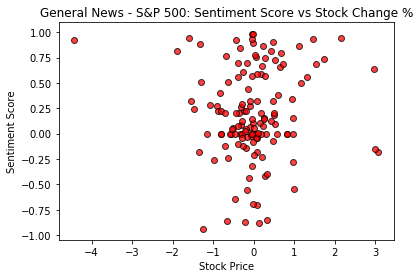

In [167]:
# Use Matplotlib and stats to generate graphs and look for relationships
#S&P Scatterplot
genNewsCombinedSP = genNewsCombined.loc[(genNewsCombined["Index"] == "S&P 500")]
sentiment_score_SP = genNewsCombinedSP['sentiment_score']
delta_SP = genNewsCombinedSP['Delta']


plt.title("General News - S&P 500: Sentiment Score vs Stock Change %")
plt.xlabel("Stock Price")
plt.ylabel("Sentiment Score")

plt.scatter(delta_SP, sentiment_score_SP , marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.savefig("General News - S&P 500: Sentiment Score vs Stock Change % Scat.png")
plt.show()


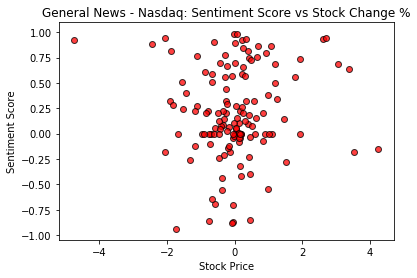

In [168]:
#Nasdaq Scatterplot
genNewsCombinedNSQ = genNewsCombined.loc[(genNewsCombined["Index"] == "Nasdaq")]
sentiment_score_NSQ = genNewsCombinedNSQ['sentiment_score']
delta_NSQ = genNewsCombinedNSQ['Delta']


plt.title("General News - Nasdaq: Sentiment Score vs Stock Change %")
plt.xlabel("Stock Price")
plt.ylabel("Sentiment Score")

plt.scatter(delta_NSQ, sentiment_score_NSQ , marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.savefig("General News - Nasdaq: Sentiment Score vs Stock Change % Scat.png")
plt.show()

In [24]:
#Nasdaq dataframe change to groupby month
genNewsCombinedNSQ['Date'] = pd.to_datetime(genNewsCombinedNSQ['Date'])
genNewsCombinedNSQ['month'] = genNewsCombinedNSQ['Date'].dt.to_period('M')
genNewsCombinedNSQ

/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score,month
1,Nasdaq,2019-01-10,6908.649902,6991.370117,6877.080078,6986.069824,6986.069824,2179080000,-1.120623,0.273200,2019-01
3,Nasdaq,2019-01-11,6947.459961,6975.649902,6933.600098,6971.479980,6971.479980,2066500000,-0.345738,0.081800,2019-01
4,Nasdaq,2019-01-14,6908.029785,6936.220215,6887.479980,6905.919922,6905.919922,1942210000,0.030542,0.276250,2019-01
6,Nasdaq,2019-01-15,6931.390137,7025.850098,6928.120117,7023.830078,7023.830078,2038090000,-1.333642,-0.264000,2019-01
8,Nasdaq,2019-01-16,7033.750000,7079.629883,7028.120117,7034.689941,7034.689941,2149580000,-0.013363,0.985300,2019-01
11,Nasdaq,2019-01-02,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2261800000,-2.444014,0.881800,2019-01
12,Nasdaq,2019-01-22,7109.569824,7110.160156,6979.810059,7020.359863,7020.359863,2380950000,1.254787,0.343467,2019-01
15,Nasdaq,2019-01-29,7087.490234,7092.290039,7011.470215,7028.290039,7028.290039,2089690000,0.835277,0.200100,2019-01
17,Nasdaq,2019-01-07,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2507550000,-0.975807,0.000000,2019-01
19,Nasdaq,2018-10-01,8091.500000,8107.379883,8019.770020,8037.299805,8037.299805,2283230000,0.669841,0.750500,2018-10


In [25]:
genNewsCombinedNSQMonth = genNewsCombinedNSQ.groupby('month')["Delta"].mean()
genNewsCombinedNSQ_df = pd.DataFrame(genNewsCombinedNSQMonth)
genNewsCombinedNSQ_df['sentiment_score'] = genNewsCombinedNSQ.groupby('month')['sentiment_score'].mean()
genNewsCombinedNSQ_df


,Delta,sentiment_score
month,,
2018-06,0.448429,-0.401900
2018-07,0.284078,0.389800
2018-08,-0.129551,-0.302417
2018-09,-0.150521,0.335271
2018-10,0.625555,0.286898
2018-11,-0.029154,0.338447
2018-12,0.371929,0.591129
2019-01,-0.456953,0.308657
2019-02,-0.455372,0.230157


In [26]:
genNewsCombinedNSQ_df.reset_index(inplace=True)

In [ ]:
genNewsCombinedNSQ_df.month = genNewsCombinedNSQ_df.month.dt.strftime('%m/%Y')

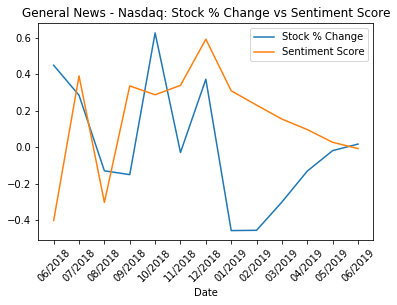

In [169]:

delta_month_nsq = genNewsCombinedNSQ_df['Delta']
score_month_nsq = genNewsCombinedNSQ_df['sentiment_score']
date = genNewsCombinedNSQ_df['month']

plt.plot(date,delta_month_nsq)
plt.plot(date,score_month_nsq)
plt.xticks(rotation=45)
plt.title("General News - Nasdaq: Stock % Change vs Sentiment Score")
plt.xlabel("Date")
plt.legend(['Stock % Change','Sentiment Score'])
plt.savefig("General News - Nasdaq: Stock % Change vs Sentiment Score Line.png")
plt.show()

In [29]:
#S&P Grouping by Month and averging out Delta and Sentiment Scores
genNewsCombinedSP['Date'] = pd.to_datetime(genNewsCombinedSP['Date'])
genNewsCombinedSP['month'] = genNewsCombinedSP['Date'].dt.to_period('M')
genNewsCombinedSP

/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score,month
0,S&P 500,2019-01-10,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000,-0.898768,0.273200,2019-01
2,S&P 500,2019-01-11,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000,-0.314898,0.081800,2019-01
5,S&P 500,2019-01-14,2580.310059,2589.320068,2570.409912,2582.610107,2582.610107,3664450000,-0.089138,0.276250,2019-01
7,S&P 500,2019-01-15,2585.100098,2613.080078,2585.100098,2610.300049,2610.300049,3572330000,-0.974815,-0.264000,2019-01
9,S&P 500,2019-01-16,2614.750000,2625.760010,2612.679932,2616.100098,2616.100098,3863770000,-0.051634,0.985300,2019-01
10,S&P 500,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,-1.335107,0.881800,2019-01
13,S&P 500,2019-01-22,2657.879883,2657.879883,2617.270020,2632.899902,2632.899902,3908030000,0.939846,0.343467,2019-01
14,S&P 500,2019-01-29,2644.889893,2650.929932,2631.050049,2640.000000,2640.000000,3504200000,0.184881,0.200100,2019-01
16,S&P 500,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,-0.555284,0.000000,2019-01
18,S&P 500,2018-10-01,2926.290039,2937.060059,2917.909912,2924.590088,2924.590088,3364190000,0.058092,0.750500,2018-10


In [30]:
genNewsCombinedSPMonth = genNewsCombinedSP.groupby('month')["Delta"].mean()
genNewsCombinedSP_df = pd.DataFrame(genNewsCombinedSPMonth)
genNewsCombinedSP_df['sentiment_score'] = genNewsCombinedSP.groupby('month')['sentiment_score'].mean()
genNewsCombinedSP_df


,Delta,sentiment_score
month,,
2018-06,0.321208,-0.401900
2018-07,0.096436,0.389800
2018-08,-0.071732,-0.302417
2018-09,-0.120361,0.335271
2018-10,0.384841,0.286898
2018-11,-0.030064,0.338447
2018-12,0.276758,0.591129
2019-01,-0.343880,0.308657
2019-02,-0.281556,0.230157


In [31]:
genNewsCombinedSP_df.reset_index(inplace=True)
genNewsCombinedSP_df

,month,Delta,sentiment_score
0,2018-06,0.321208,-0.401900
1,2018-07,0.096436,0.389800
2,2018-08,-0.071732,-0.302417
3,2018-09,-0.120361,0.335271
4,2018-10,0.384841,0.286898
5,2018-11,-0.030064,0.338447
6,2018-12,0.276758,0.591129
7,2019-01,-0.343880,0.308657
8,2019-02,-0.281556,0.230157
9,2019-03,-0.262679,0.153606


In [ ]:
genNewsCombinedSP_df.month = genNewsCombinedSP_df.month.dt.strftime('%m/%Y')

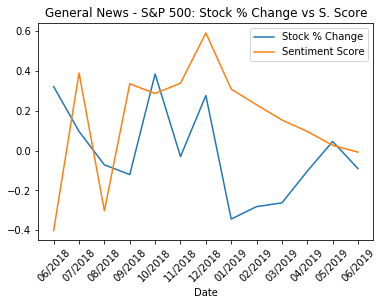

In [170]:
delta_month_sp = genNewsCombinedSP_df['Delta']
score_month_sp = genNewsCombinedSP_df['sentiment_score']
date = genNewsCombinedSP_df['month']

plt.plot(date,delta_month_sp)
plt.plot(date,score_month_sp)
plt.xticks(rotation=45)
plt.title("General News - S&P 500: Stock % Change vs S. Score")
plt.xlabel("Date")
plt.legend(['Stock % Change','Sentiment Score'])
plt.savefig("General News - S&P 500: Stock % Change vs S. Score Line.png")
plt.show()

In [34]:
tesla_data = "TSLA.csv"
tesla_df = pd.read_csv("TSLA.csv")
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-29,353.329987,353.859985,342.410004,342.950012,342.950012,6492400
1,2018-07-02,360.070007,364.779999,329.850006,335.070007,335.070007,18759800
2,2018-07-03,331.750000,332.489990,309.690002,310.859985,310.859985,12282600
3,2018-07-05,313.760010,314.390015,296.220001,309.160004,309.160004,17476400
4,2018-07-06,304.950012,312.070007,302.000000,308.899994,308.899994,8865500


In [35]:
tesla_df['Delta'] = (tesla_df.Open - tesla_df.Close)*100/tesla_df.Open

In [36]:
tesla_df = tesla_df.sort_values(by=['Date'])
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Delta
0,2018-06-29,353.329987,353.859985,342.410004,342.950012,342.950012,6492400,2.937757
1,2018-07-02,360.070007,364.779999,329.850006,335.070007,335.070007,18759800,6.943094
2,2018-07-03,331.750000,332.489990,309.690002,310.859985,310.859985,12282600,6.296915
3,2018-07-05,313.760010,314.390015,296.220001,309.160004,309.160004,17476400,1.466091
4,2018-07-06,304.950012,312.070007,302.000000,308.899994,308.899994,8865500,-1.295288


In [37]:
tesla_df.Date = pd.to_datetime(tesla_df.Date)

In [38]:
tesla_df.Date = tesla_df.Date.dt.strftime('%m/%d/%Y') 

In [39]:
TeslaNews.head()

,datePublished,description,keywords,provider,title,url,sentiment_score,sentiment
0,06/29/2019,All eyes are on the Model 3 as the new vehicle...,"can model 3 deliveries,tesla news",ibtimes,Tesla News: Can Model 3 Deliveries Keep Rising?,http://ibtimes.com/tesla-news-can-model-3-deli...,0,negative
1,06/25/2019,This Electrek app provides you with articles r...,"technology,electrek,services,tesla",zdnet,Technology & Tesla News Download,https://downloads.zdnet.com/product/2164-78131...,0.2732,positive
2,06/12/2019,TESLA CEO is one step closer to becoming a rea...,"tesla news,science,james,car",express,Tesla news: Elon Musk's SUBMARINE car is strai...,https://www.express.co.uk/news/science/1139729...,0.296,positive
3,05/17/2019,"In the latest Tesla news, TSLA stock is sinkin...","tesla model,autopilot",investorplace,Tesla News: Why TSLA Stock Is Tumbling Today T...,https://investorplace.com/2019/05/tesla-news-t...,-0.4019,negative
4,02/28/2019,The billionaire has a surprise up his sleeve f...,"reveal big tesla news,metro news,elon musk,twi...",metro,Elon Musk changes Twitter name as he prepares ...,https://metro.co.uk/2019/02/28/elon-musk-chang...,0.2732,positive


In [40]:
# change data type of sentiment score to numeric
TeslaNews.sentiment_score = pd.to_numeric(TeslaNews.sentiment_score)

# change name of date column to match stock DF
TeslaNews = TeslaNews.rename(columns = {'datePublished':'Date'})


In [41]:
TeslaNewsSummary = TeslaNews.groupby('Date')['sentiment_score'].mean()

In [42]:
TeslaNewsSummary.head()

Date
01/07/2019    0.0000
01/11/2011    0.4588
01/12/2019    0.4019
01/18/2019    0.0000
01/30/2019    0.5106
Name: sentiment_score, dtype: float64

In [43]:
# Merge 2 dataframes on Date
TeslaNewsCombined = pd.merge(tesla_df,TeslaNewsSummary, on = 'Date', how = 'inner')

In [44]:
TeslaNewsCombined.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score
0,06/29/2018,353.329987,353.859985,342.410004,342.950012,342.950012,6492400,2.937757,0.0258
1,07/10/2018,324.559998,327.679993,319.200012,322.470001,322.470001,9471500,0.643948,-0.0829
2,07/13/2018,315.579987,319.579987,309.250000,318.869995,318.869995,5869800,-1.042527,-0.4404
3,07/16/2018,311.709991,315.160004,306.250000,310.100006,310.100006,7818700,0.516501,-0.1779
4,07/19/2018,316.329987,323.540009,314.010010,320.230011,320.230011,5915300,-1.232897,0.0000


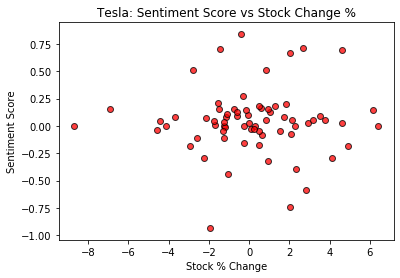

In [171]:
sentiment_score_TSLA = TeslaNewsCombined['sentiment_score']
delta_TSLA = TeslaNewsCombined['Delta']

plt.title("Tesla: Sentiment Score vs Stock Change %")
plt.xlabel("Stock % Change")
plt.ylabel("Sentiment Score")

plt.scatter(delta_TSLA, sentiment_score_TSLA , marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.savefig("Tesla: Sentiment Score vs Stock Change % Scat.png")
plt.show()

In [46]:
TeslaNewsCombined['Date'] = pd.to_datetime(TeslaNewsCombined['Date'])
TeslaNewsCombined['month'] = TeslaNewsCombined['Date'].dt.to_period('M')
TeslaNewsCombined.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score,month
0,2018-06-29,353.329987,353.859985,342.410004,342.950012,342.950012,6492400,2.937757,0.0258,2018-06
1,2018-07-10,324.559998,327.679993,319.200012,322.470001,322.470001,9471500,0.643948,-0.0829,2018-07
2,2018-07-13,315.579987,319.579987,309.250000,318.869995,318.869995,5869800,-1.042527,-0.4404,2018-07
3,2018-07-16,311.709991,315.160004,306.250000,310.100006,310.100006,7818700,0.516501,-0.1779,2018-07
4,2018-07-19,316.329987,323.540009,314.010010,320.230011,320.230011,5915300,-1.232897,0.0000,2018-07


In [47]:
TeslaNewsCombinedMonth = TeslaNewsCombined.groupby('month')["Delta"].mean()
TeslaNewsCombined_df = pd.DataFrame(TeslaNewsCombinedMonth)
TeslaNewsCombined_df['sentiment_score'] = TeslaNewsCombined.groupby('month')['sentiment_score'].mean()
TeslaNewsCombined_df


,Delta,sentiment_score
month,,
2018-06,2.937757,0.025800
2018-07,0.236240,-0.140240
2018-08,0.472585,0.504800
2018-09,0.741777,0.349250
2018-10,1.659979,0.180887
2018-11,-0.264315,-0.153100
2018-12,-8.696665,0.000000
2019-01,-0.154500,0.170200
2019-02,-0.127666,-0.154233


In [48]:
TeslaNewsCombined_df.reset_index(inplace=True)
TeslaNewsCombined_df

,month,Delta,sentiment_score
0,2018-06,2.937757,0.025800
1,2018-07,0.236240,-0.140240
2,2018-08,0.472585,0.504800
3,2018-09,0.741777,0.349250
4,2018-10,1.659979,0.180887
5,2018-11,-0.264315,-0.153100
6,2018-12,-8.696665,0.000000
7,2019-01,-0.154500,0.170200
8,2019-02,-0.127666,-0.154233
9,2019-03,2.849994,-0.590400


In [50]:
from datetime import datetime

#TeslaNewsCombined_df.month = pd.to_datetime(TeslaNewsCombined_df['month'])

In [51]:
TeslaNewsCombined_df.month = TeslaNewsCombined_df.month.dt.strftime('%m/%Y')


/anaconda3/envs/Pythondata/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


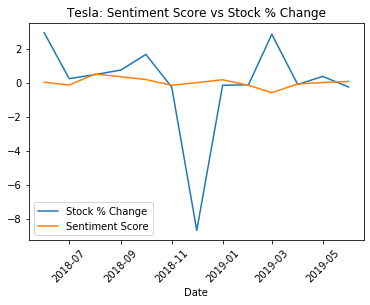

In [172]:

delta_month_TSLA = TeslaNewsCombined_df['Delta']
score_month_TSLA = TeslaNewsCombined_df['sentiment_score']
date = TeslaNewsCombined_df['month']

plt.plot(date,delta_month_TSLA)
plt.plot(date,score_month_TSLA)
plt.xticks(rotation=45)
plt.title("Tesla: Sentiment Score vs Stock % Change")
plt.xlabel("Date")
plt.legend(['Stock % Change','Sentiment Score'])
plt.savefig("Tesla: Sentiment Score vs Stock Change % Line.png")
plt.show()

In [53]:
#Bring in Wayfair stock data
wayfair_data = "W.csv"
wayfair_df = pd.read_csv("W.csv")
wayfair_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-29,118.889999,119.500000,116.642998,118.760002,118.760002,1117400
1,2018-07-02,117.470001,117.620003,115.360001,115.910004,115.910004,1346200
2,2018-07-03,117.589996,118.074997,115.000000,115.940002,115.940002,607500
3,2018-07-05,117.269997,117.900002,114.660004,117.820000,117.820000,978300
4,2018-07-06,117.419998,122.050003,117.330002,121.739998,121.739998,1344000


In [54]:
#Add delta column
wayfair_df['Delta'] = (wayfair_df.Open - wayfair_df.Close)*100/wayfair_df.Open

In [55]:
#Sort by dates
wayfair_df = wayfair_df.sort_values(by=['Date'])
wayfair_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Delta
0,2018-06-29,118.889999,119.500000,116.642998,118.760002,118.760002,1117400,0.109342
1,2018-07-02,117.470001,117.620003,115.360001,115.910004,115.910004,1346200,1.327996
2,2018-07-03,117.589996,118.074997,115.000000,115.940002,115.940002,607500,1.403175
3,2018-07-05,117.269997,117.900002,114.660004,117.820000,117.820000,978300,-0.469006
4,2018-07-06,117.419998,122.050003,117.330002,121.739998,121.739998,1344000,-3.679101


In [56]:
#Convert column to datetime
wayfair_df.Date = pd.to_datetime(wayfair_df.Date)

In [57]:
#Reformat date column
wayfair_df.Date = wayfair_df.Date.dt.strftime('%m/%d/%Y')
wayfair_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Delta
0,06/29/2018,118.889999,119.500000,116.642998,118.760002,118.760002,1117400,0.109342
1,07/02/2018,117.470001,117.620003,115.360001,115.910004,115.910004,1346200,1.327996
2,07/03/2018,117.589996,118.074997,115.000000,115.940002,115.940002,607500,1.403175
3,07/05/2018,117.269997,117.900002,114.660004,117.820000,117.820000,978300,-0.469006
4,07/06/2018,117.419998,122.050003,117.330002,121.739998,121.739998,1344000,-3.679101


In [58]:
# change data type of sentiment score to numeric
WayFairNews.sentiment_score = pd.to_numeric(WayFairNews.sentiment_score)

# change name of date column to match stock DF
WayFairNews = WayFairNews.rename(columns = {'datePublished':'Date'})


In [59]:
#Create Summary table grouping by Date
WayFairNewsSummary = WayFairNews.groupby('Date')['sentiment_score'].mean()
WayFairNewsSummary.head()

Date
01/01/2019    0.310000
01/02/2019    0.000000
01/04/2019    0.968200
01/05/2019    0.891000
01/06/2019    0.251529
Name: sentiment_score, dtype: float64

In [60]:
#Merge the stock data and the news sentiment data
WayFairNewsCombined = pd.merge(wayfair_df,WayFairNewsSummary, on = 'Date', how = 'inner')
WayFairNewsCombined.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score
0,07/02/2018,117.470001,117.620003,115.360001,115.910004,115.910004,1346200,1.327996,0.000000
1,07/05/2018,117.269997,117.900002,114.660004,117.820000,117.820000,978300,-0.469006,-0.728100
2,08/13/2018,123.239998,125.290001,121.120003,122.269997,122.269997,1616500,0.787083,0.421500
3,08/16/2018,120.879997,121.050003,117.362000,118.680000,118.680000,724900,1.819984,0.300933
4,08/17/2018,119.050003,120.120003,117.275002,119.309998,119.309998,859700,-0.218391,0.344033


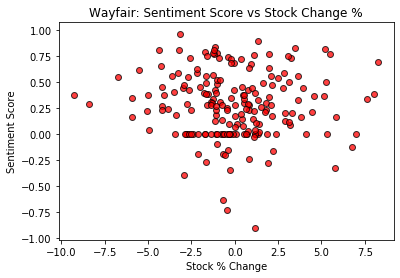

In [174]:
#Plot Wayfair scatter plot to see if there is a correlation
sentiment_score_W = WayFairNewsCombined['sentiment_score']
delta_W = WayFairNewsCombined['Delta']

plt.title("Wayfair: Sentiment Score vs Stock Change %")
plt.xlabel("Stock % Change")
plt.ylabel("Sentiment Score")

plt.scatter(delta_W, sentiment_score_W , marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.savefig("Wayfair: Sentiment Score vs Stock Change %Scat.png")
plt.show()

In [62]:
#Convert and add a new column to show only the month
WayFairNewsCombined['Date'] = pd.to_datetime(WayFairNewsCombined['Date'])
WayFairNewsCombined['month'] = WayFairNewsCombined['Date'].dt.to_period('M')
WayFairNewsCombined.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score,month
0,2018-07-02,117.470001,117.620003,115.360001,115.910004,115.910004,1346200,1.327996,0.000000,2018-07
1,2018-07-05,117.269997,117.900002,114.660004,117.820000,117.820000,978300,-0.469006,-0.728100,2018-07
2,2018-08-13,123.239998,125.290001,121.120003,122.269997,122.269997,1616500,0.787083,0.421500,2018-08
3,2018-08-16,120.879997,121.050003,117.362000,118.680000,118.680000,724900,1.819984,0.300933,2018-08
4,2018-08-17,119.050003,120.120003,117.275002,119.309998,119.309998,859700,-0.218391,0.344033,2018-08


In [63]:
#Create new dataframe to group by month
WayFairNewsCombinedMonth = WayFairNewsCombined.groupby('month')["Delta"].mean()
WayFairNewsCombined_df = pd.DataFrame(WayFairNewsCombinedMonth)
WayFairNewsCombined_df['sentiment_score'] = WayFairNewsCombined.groupby('month')['sentiment_score'].mean()
WayFairNewsCombined_df


,Delta,sentiment_score
month,,
2018-07,0.429495,-0.364050
2018-08,-0.550600,0.399392
2018-09,-0.900299,0.401599
2018-10,1.749845,0.390755
2018-11,-0.926878,0.422265
2018-12,1.489572,0.307700
2019-01,-1.292975,0.295555
2019-02,-0.958850,0.254478
2019-03,0.605020,0.103447


In [64]:
#Reset the index
WayFairNewsCombined_df.reset_index(inplace=True)
WayFairNewsCombined_df

,month,Delta,sentiment_score
0,2018-07,0.429495,-0.364050
1,2018-08,-0.550600,0.399392
2,2018-09,-0.900299,0.401599
3,2018-10,1.749845,0.390755
4,2018-11,-0.926878,0.422265
5,2018-12,1.489572,0.307700
6,2019-01,-1.292975,0.295555
7,2019-02,-0.958850,0.254478
8,2019-03,0.605020,0.103447
9,2019-04,-0.111925,0.339844


In [65]:
#Import datetime
from datetime import datetime

TeslaNewsCombined_df.month = pd.to_datetime(TeslaNewsCombined_df['month'])



In [66]:
#Convert date to have month be first
WayFairNewsCombined_df.month = WayFairNewsCombined_df.month.dt.strftime('%m/%Y')

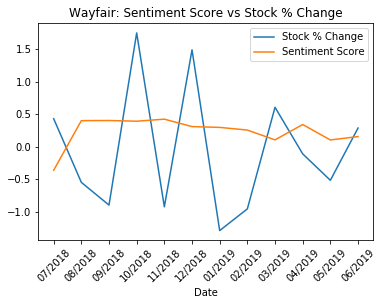

In [177]:
#Plot line graph over a year's time showing stock change and sentiment score.
delta_month_W = WayFairNewsCombined_df['Delta']
score_month_W = WayFairNewsCombined_df['sentiment_score']
date = WayFairNewsCombined_df['month']

plt.plot(date,delta_month_W)
plt.plot(date,score_month_W)
plt.xticks(rotation=45)
plt.title("Wayfair: Sentiment Score vs Stock % Change")
plt.xlabel("Date")
plt.legend(['Stock % Change','Sentiment Score'])
plt.savefig("Wayfair: Sentiment Score vs Stock % Change Line.png")
plt.show()

In [86]:
#Bring in Wells Fargo stock data
wells_data = "WFC.csv"
wells_df = pd.read_csv("WFC.csv")
wells_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-29,55.619999,57.119999,55.410000,55.439999,53.587044,43888500
1,2018-07-02,55.200001,56.380001,55.070000,56.320000,54.437630,21204900
2,2018-07-03,56.430000,56.630001,55.430000,55.560001,53.703026,12830400
3,2018-07-05,55.919998,56.080002,55.049999,55.240002,53.393730,16788600
4,2018-07-06,55.299999,56.130001,55.029999,55.889999,54.021999,12389100


In [87]:
#Add delta column
wells_df['Delta'] = (wells_df.Open - wells_df.Close)*100/wells_df.Open

In [95]:
#Sort by dates
wells_df = wells_df.sort_values(by=['Date'])
wells_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Delta
0,2018-06-29,55.619999,57.119999,55.410000,55.439999,53.587044,43888500,0.323625
1,2018-07-02,55.200001,56.380001,55.070000,56.320000,54.437630,21204900,-2.028984
2,2018-07-03,56.430000,56.630001,55.430000,55.560001,53.703026,12830400,1.541731
3,2018-07-05,55.919998,56.080002,55.049999,55.240002,53.393730,16788600,1.216016
4,2018-07-06,55.299999,56.130001,55.029999,55.889999,54.021999,12389100,-1.066908


In [96]:
#Convert column to datetime
wells_df.Date = pd.to_datetime(wells_df.Date)

In [97]:
#Reformat date column
wells_df.Date = wells_df.Date.dt.strftime('%m/%d/%Y')
wells_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Delta
0,06/29/2018,55.619999,57.119999,55.410000,55.439999,53.587044,43888500,0.323625
1,07/02/2018,55.200001,56.380001,55.070000,56.320000,54.437630,21204900,-2.028984
2,07/03/2018,56.430000,56.630001,55.430000,55.560001,53.703026,12830400,1.541731
3,07/05/2018,55.919998,56.080002,55.049999,55.240002,53.393730,16788600,1.216016
4,07/06/2018,55.299999,56.130001,55.029999,55.889999,54.021999,12389100,-1.066908


In [98]:
# change data type of sentiment score to numeric
WellsFargoNews.sentiment_score = pd.to_numeric(WellsFargoNews.sentiment_score)

# change name of date column to match stock DF
WellsFargoNews = WellsFargoNews.rename(columns = {'datePublished':'Date'})

In [99]:
#Create Summary table grouping by Date
WellsFargoNewsSummary = WellsFargoNews.groupby('Date')['sentiment_score'].mean()
WellsFargoNewsSummary.head()

Date
01/09/2018    0.250000
01/13/2019    0.557400
01/14/2019    0.502800
01/15/2019    0.574767
01/19/2019    0.210450
Name: sentiment_score, dtype: float64

In [101]:
#Merge the stock data and the news sentiment data
WellsFargoNewsCombined = pd.merge(wells_df,WellsFargoNewsSummary, on = 'Date', how = 'inner')
WellsFargoNewsCombined.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score
0,08/01/2018,57.959999,58.279999,57.209999,57.650002,55.723179,19192700,0.534846,0.7845
1,08/28/2018,59.189999,59.330002,58.990002,59.070000,57.513538,19330200,0.202735,0.6249
2,10/12/2018,52.099998,53.330002,50.869999,52.110001,50.736931,32067300,-0.019200,0.2500
3,10/18/2018,54.169998,54.400002,52.759998,53.099998,51.700844,22533300,1.975263,-0.2263
4,10/26/2018,51.320000,51.930000,50.790001,51.250000,49.899590,30053800,0.136399,0.6124


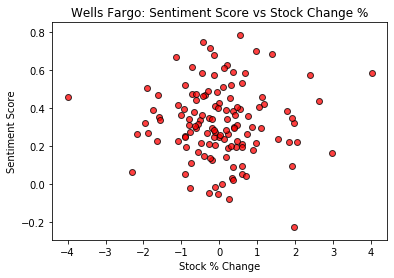

In [176]:
#Plot Wayfair scatter plot to see if there is a correlation
sentiment_score_WFC = WellsFargoNewsCombined['sentiment_score']
delta_WFC = WellsFargoNewsCombined['Delta']

plt.title("Wells Fargo: Sentiment Score vs Stock Change %")
plt.xlabel("Stock % Change")
plt.ylabel("Sentiment Score")

plt.scatter(delta_WFC, sentiment_score_WFC, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.savefig("Wells Fargo: Sentiment Score vs Stock Change % Scat.png")
plt.show()

In [103]:
#Convert and add a new column to show only the month
WellsFargoNewsCombined['Date'] = pd.to_datetime(WellsFargoNewsCombined['Date'])
WellsFargoNewsCombined['month'] = WellsFargoNewsCombined['Date'].dt.to_period('M')
WellsFargoNewsCombined.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score,month
0,2018-08-01,57.959999,58.279999,57.209999,57.650002,55.723179,19192700,0.534846,0.7845,2018-08
1,2018-08-28,59.189999,59.330002,58.990002,59.070000,57.513538,19330200,0.202735,0.6249,2018-08
2,2018-10-12,52.099998,53.330002,50.869999,52.110001,50.736931,32067300,-0.019200,0.2500,2018-10
3,2018-10-18,54.169998,54.400002,52.759998,53.099998,51.700844,22533300,1.975263,-0.2263,2018-10
4,2018-10-26,51.320000,51.930000,50.790001,51.250000,49.899590,30053800,0.136399,0.6124,2018-10


In [104]:
#Create new dataframe to group by month
WellsFargoNewsCombinedMonth = WellsFargoNewsCombined.groupby('month')["Delta"].mean()
WellsFargoNewsCombined_df = pd.DataFrame(WellsFargoNewsCombinedMonth)
WellsFargoNewsCombined_df['sentiment_score'] = WellsFargoNewsCombined.groupby('month')['sentiment_score'].mean()
WellsFargoNewsCombined_df.head()


,Delta,sentiment_score
month,,
2018-08,0.368791,0.704700
2018-10,0.354458,0.254475
2018-11,0.397576,0.444836
2018-12,0.782243,0.456750
2019-01,-0.232104,0.378680


In [108]:
#Reset the index
WellsFargoNewsCombined_df.reset_index(inplace=True)
WellsFargoNewsCombined_df

,month,Delta,sentiment_score
0,2018-08,0.368791,0.704700
1,2018-10,0.354458,0.254475
2,2018-11,0.397576,0.444836
3,2018-12,0.782243,0.456750
4,2019-01,-0.232104,0.378680
5,2019-02,-0.027244,0.271477
6,2019-03,0.268889,0.198085
7,2019-04,-0.110511,0.325343
8,2019-05,-0.064634,0.387234
9,2019-06,-0.154368,0.329139


In [111]:
#Import datetime
from datetime import datetime

#WellsFargoNewsCombined_df.month = pd.to_datetime(WellsFargoNewsCombined_df['month'])



In [113]:
#Convert date to have month be first
WellsFargoNewsCombined_df.month = WellsFargoNewsCombined_df.month.dt.strftime('%m/%Y')

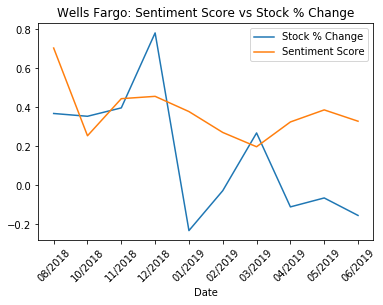

In [178]:
#Plot line graph over a year's time showing stock change and sentiment score.
delta_month_WFC = WellsFargoNewsCombined_df['Delta']
score_month_WFC = WellsFargoNewsCombined_df['sentiment_score']
date = WellsFargoNewsCombined_df['month']

plt.plot(date,delta_month_WFC)
plt.plot(date,score_month_WFC)
plt.xticks(rotation=45)
plt.title("Wells Fargo: Sentiment Score vs Stock % Change")
plt.xlabel("Date")
plt.legend(['Stock % Change','Sentiment Score'])
plt.savefig("Wells Fargo: Sentiment Score vs Stock % Change Line.png")
plt.show()

In [117]:
#Check Political News
PoliNews.head()

,datePublished,description,keywords,provider,title,url,sentiment_score,sentiment
0,07/02/2019,"Music, Film, TV and Political News Coverage","rolling stone,political,film,tv",rollingstone,"Taylor Swift, Scooter Braun, Scott Borchetta: ...",https://www.rollingstone.com/music/music-news/...,0,negative
1,07/01/2019,Gen Z's go-to source for political news is Ins...,"business insider india,political news,gen,ist",businessinsider,and it's already having an impact on the 2020 ...,http://businessinsider.in/instagram-is-gen-zs-...,0,negative
2,06/29/2019,Lawmakers seeking to slap gambling-addiction w...,"lottery tickets,political news,warnings,desantis",sunshinestatenews,DeSantis Vetoes Warnings on Lottery Tickets,http://sunshinestatenews.com/story/desantis-ve...,-0.8519,negative
3,06/28/2019,The Supreme Court will decide whether Presiden...,"president donald trump,political news",wthr,Supreme Court to decide on Trump bid to end DACA,https://www.wthr.com/article/supreme-court-dec...,0.5574,positive
4,06/24/2019,"Saturday night, WJTV launched it's new weekly ...","new weekly political program,mississippi polit...",yallpolitics,WJTV kicks off new weekly political program ca...,https://www.yallpolitics.com/2019/06/24/wjtv-k...,0.128,positive


In [118]:
# change data type of sentiment score to numeric
PoliNews.sentiment_score = pd.to_numeric(PoliNews.sentiment_score)

# change name of date column to match stock DF
PoliNews = PoliNews.rename(columns = {'datePublished':'Date'})


In [119]:
PoliNewsSummary = PoliNews.groupby('Date')['sentiment_score'].mean()
PoliNewsSummary.head()

Date
01/04/2001    0.0000
01/08/2019    0.0000
01/15/2014   -0.7430
01/15/2019   -0.8906
01/17/2014    0.1531
Name: sentiment_score, dtype: float64

In [130]:
# Merge 2 dataframes on Date
PoliNewsCombined = pd.merge(stock_df,PoliNewsSummary, on = 'Date', how = 'inner')
PoliNewsCombined['Delta'] = (PoliNewsCombined.Open - PoliNewsCombined.Close)*100/PoliNewsCombined.Open
PoliNewsCombined

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score
0,Nasdaq,10/15/2018,7473.330078,7500.930176,7400.069824,7430.740234,7430.740234,2148850000,0.569891,-0.3885
1,S&P 500,10/15/2018,2763.830078,2775.989990,2749.030029,2750.790039,2750.790039,3300140000,0.471810,-0.3885
2,Nasdaq,10/16/2018,7501.779785,7658.140137,7493.439941,7645.490234,7645.490234,2623300000,-1.915685,0.5106
3,S&P 500,10/16/2018,2767.050049,2813.459961,2766.909912,2809.919922,2809.919922,3428340000,-1.549299,0.5106
4,Nasdaq,10/26/2018,7125.180176,7283.319824,7057.000000,7167.209961,7167.209961,2964780000,-0.589877,-0.7468
5,S&P 500,10/26/2018,2667.860107,2692.379883,2628.159912,2658.689941,2658.689941,4803150000,0.343727,-0.7468
6,Nasdaq,10/31/2018,7276.620117,7368.490234,7270.629883,7305.899902,7305.899902,2899730000,-0.402382,0.6808
7,S&P 500,10/31/2018,2705.600098,2736.689941,2705.600098,2711.739990,2711.739990,5112420000,-0.226933,0.6808
8,Nasdaq,11/30/2018,7279.299805,7332.790039,7255.680176,7330.540039,7330.540039,2542820000,-0.703917,0.6369
9,S&P 500,11/30/2018,2737.760010,2760.879883,2732.760010,2760.169922,2760.169922,4658580000,-0.818549,0.6369


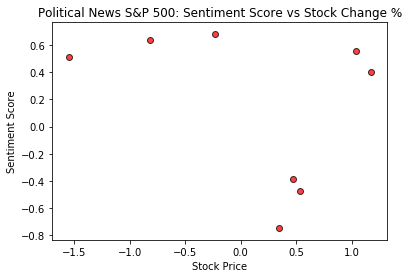

In [179]:
# Use Matplotlib and stats to generate graphs and look for relationships
#S&P Scatterplot
PoliNewsCombinedSP = PoliNewsCombined.loc[(PoliNewsCombined["Index"] == "S&P 500")]
Polisentiment_score_SP = PoliNewsCombinedSP['sentiment_score']
Polidelta_SP = PoliNewsCombinedSP['Delta']


plt.title("Political News S&P 500: Sentiment Score vs Stock Change %")
plt.xlabel("Stock Price")
plt.ylabel("Sentiment Score")

plt.scatter(Polidelta_SP, Polisentiment_score_SP , marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.savefig("Political News S&P 500: Sentiment Score vs Stock Change % Scat.png")
plt.show()


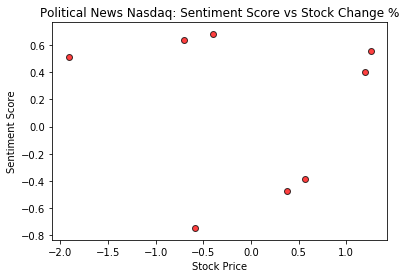

In [180]:
PoliNewsCombinedNSQ = PoliNewsCombined.loc[(PoliNewsCombined["Index"] == "Nasdaq")]
Polisentiment_score_NSQ = PoliNewsCombinedNSQ['sentiment_score']
Polidelta_NSQ = PoliNewsCombinedNSQ['Delta']


plt.title("Political News Nasdaq: Sentiment Score vs Stock Change %")
plt.xlabel("Stock Price")
plt.ylabel("Sentiment Score")

plt.scatter(Polidelta_NSQ, Polisentiment_score_NSQ, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.savefig("Political News Nasdaq: Sentiment Score vs Stock Change % Scat.png")
plt.show()


In [132]:
#Convert and add a new column to show only the month
PoliNewsCombined['Date'] = pd.to_datetime(PoliNewsCombined['Date'])
PoliNewsCombined['month'] = PoliNewsCombined['Date'].dt.to_period('M')
PoliNewsCombined.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score,month
0,Nasdaq,2018-10-15,7473.330078,7500.930176,7400.069824,7430.740234,7430.740234,2148850000,0.569891,-0.3885,2018-10
1,S&P 500,2018-10-15,2763.830078,2775.989990,2749.030029,2750.790039,2750.790039,3300140000,0.471810,-0.3885,2018-10
2,Nasdaq,2018-10-16,7501.779785,7658.140137,7493.439941,7645.490234,7645.490234,2623300000,-1.915685,0.5106,2018-10
3,S&P 500,2018-10-16,2767.050049,2813.459961,2766.909912,2809.919922,2809.919922,3428340000,-1.549299,0.5106,2018-10
4,Nasdaq,2018-10-26,7125.180176,7283.319824,7057.000000,7167.209961,7167.209961,2964780000,-0.589877,-0.7468,2018-10


In [133]:
#Create new dataframe to group by month
PoliNewsCombinedMonth = PoliNewsCombined.groupby('month')["Delta"].mean()
PoliNewsCombined_df = pd.DataFrame(PoliNewsCombinedMonth)
PoliNewsCombined_df['sentiment_score'] = PoliNewsCombined.groupby('month')['sentiment_score'].mean()
PoliNewsCombined_df.head()

,Delta,sentiment_score
month,,
2018-10,-0.412343,0.014025
2018-11,-0.761233,0.636900
2018-12,0.932178,0.160867


In [134]:
#Reset the index
PoliNewsCombined_df.reset_index(inplace=True)
PoliNewsCombined_df

,month,Delta,sentiment_score
0,2018-10,-0.412343,0.014025
1,2018-11,-0.761233,0.636900
2,2018-12,0.932178,0.160867


In [135]:
#Convert date to have month be first
PoliNewsCombined_df.month = PoliNewsCombined_df.month.dt.strftime('%m/%Y')

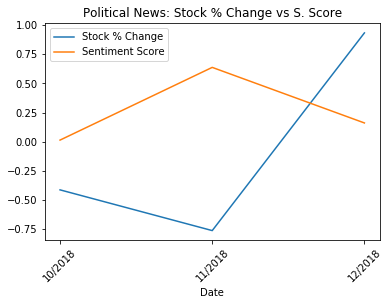

In [181]:
#Plot line graph over a year's time showing stock change and sentiment score.
delta_month_P = PoliNewsCombined_df['Delta']
score_month_P = PoliNewsCombined_df['sentiment_score']
date = PoliNewsCombined_df['month']

plt.plot(date,delta_month_P)
plt.plot(date,score_month_P)
plt.xticks(rotation=45)
plt.title("Political News: Stock % Change vs S. Score")
plt.xlabel("Date")
plt.legend(['Stock % Change','Sentiment Score'])
plt.savefig("Political News: Stock % Change vs S. Score Line.png")
plt.show()

In [137]:
FinNews.head()

,datePublished,description,keywords,provider,title,url,sentiment_score,sentiment
0,07/02/2019,"The ""Fast Money"" traders share their final tra...","financial news,business,quotes,data",cnbc,"Final Trade: KO, STZ, TJX & SMH",https://www.cnbc.com/video/2019/07/02/final-tr...,0.296,positive
1,06/29/2019,"MarketWatch provides the latest stock market, ...","stock market news,financial news,marketwatch",marketwatch,MarketWatch: Stock Market News,http://www.marketwatch.com/topics/columns/trad...,0,negative
2,06/20/2019,THE BUSINESS TIMES - Find latest business & fi...,"business times,financial news,videos,house",businesstimes,Get the Latest Business & Financial News,http://businesstimes.com.sg/atom/174420,0.2023,positive
3,06/19/2019,How is financial news like a crying baby? Robe...,"cfa institute enterprising investor,financial ...",cfainstitute,How to Read Financial News Redux: Process Dete...,https://blogs.cfainstitute.org/investor/2019/0...,-0.1531,negative
4,06/12/2019,"The Street, the financial news company started...","street has agreed to sell,financial news compa...",nypost,Jim Cramers financial news company The Street ...,https://nypost.com/2019/06/12/jim-cramers-fina...,0.2732,positive


In [138]:
# change data type of sentiment score to numeric
FinNews.sentiment_score = pd.to_numeric(FinNews.sentiment_score)

# change name of date column to match stock DF
FinNews = FinNews.rename(columns = {'datePublished':'Date'})


In [139]:
FinNewsSummary = FinNews.groupby('Date')['sentiment_score'].mean()
FinNewsSummary.head()

Date
01/04/2018    0.0000
01/05/2017    0.9028
01/06/2015   -0.5574
01/08/2001   -0.8024
01/08/2019    0.5267
Name: sentiment_score, dtype: float64

In [140]:
# Merge 2 dataframes on Date
FinNewsCombined = pd.merge(stock_df,FinNewsSummary, on = 'Date', how = 'inner')
FinNewsCombined['Delta'] = (FinNewsCombined.Open - FinNewsCombined.Close)*100/FinNewsCombined.Open
FinNewsCombined

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score
0,S&P 500,10/10/2018,2873.899902,2874.020020,2784.860107,2785.679932,2785.679932,4501250000,3.069695,0.782100
1,Nasdaq,10/10/2018,7694.080078,7701.200195,7420.560059,7422.049805,7422.049805,3077330000,3.535579,0.782100
2,S&P 500,10/17/2018,2811.669922,2816.939941,2781.810059,2809.209961,2809.209961,3321710000,0.087491,0.305867
3,Nasdaq,10/17/2018,7669.259766,7670.490234,7563.089844,7642.700195,7642.700195,2364720000,0.346312,0.305867
4,Nasdaq,10/19/2018,7530.160156,7582.890137,7428.299805,7449.029785,7449.029785,2532220000,1.077406,-0.726900
5,S&P 500,10/19/2018,2775.659912,2797.770020,2760.270020,2767.780029,2767.780029,3566490000,0.283892,-0.726900
6,Nasdaq,10/31/2018,7276.620117,7368.490234,7270.629883,7305.899902,7305.899902,2899730000,-0.402382,0.177900
7,S&P 500,10/31/2018,2705.600098,2736.689941,2705.600098,2711.739990,2711.739990,5112420000,-0.226933,0.177900
8,S&P 500,11/23/2018,2633.360107,2647.550049,2631.090088,2632.560059,2632.560059,1651650000,0.030381,0.000000
9,Nasdaq,11/23/2018,6919.520020,6987.890137,6919.160156,6938.979980,6938.979980,958950000,-0.281233,0.000000


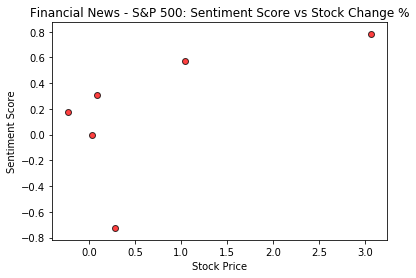

In [185]:
# Use Matplotlib and stats to generate graphs and look for relationships
#S&P Scatterplot
FinNewsCombinedSP = FinNewsCombined.loc[(FinNewsCombined["Index"] == "S&P 500")]
Finsentiment_score_SP = FinNewsCombinedSP['sentiment_score']
Findelta_SP = FinNewsCombinedSP['Delta']


plt.title("Financial News - S&P 500: Sentiment Score vs Stock Change %")
plt.xlabel("Stock Price")
plt.ylabel("Sentiment Score")

plt.scatter(Findelta_SP, Finsentiment_score_SP , marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.savefig("FinNews - S&P 500: Sentiment Score vs Stock Change % Scat.png")
plt.show()


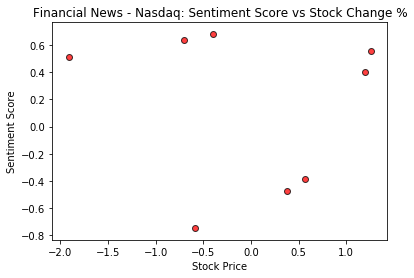

In [186]:
# Use Matplotlib and stats to generate graphs and look for relationships
#S&P Scatterplot
FinNewsCombinedNSQ = FinNewsCombined.loc[(FinNewsCombined["Index"] == "Nasdaq")]
Finsentiment_score_NSQ = FinNewsCombinedNSQ['sentiment_score']
Findelta_NSQ = FinNewsCombinedNSQ['Delta']


plt.title("Financial News - Nasdaq: Sentiment Score vs Stock Change %")
plt.xlabel("Stock Price")
plt.ylabel("Sentiment Score")

plt.scatter(Polidelta_NSQ, Polisentiment_score_NSQ , marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.savefig("FinNews - Nasdaq: Sentiment Score vs Stock Change % Scat.png")
plt.show()


In [146]:
#Convert and add a new column to show only the month
FinNewsCombined['Date'] = pd.to_datetime(FinNewsCombined['Date'])
FinNewsCombined['month'] = FinNewsCombined['Date'].dt.to_period('M')
FinNewsCombined.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Delta,sentiment_score,month
0,S&P 500,2018-10-10,2873.899902,2874.020020,2784.860107,2785.679932,2785.679932,4501250000,3.069695,0.782100,2018-10
1,Nasdaq,2018-10-10,7694.080078,7701.200195,7420.560059,7422.049805,7422.049805,3077330000,3.535579,0.782100,2018-10
2,S&P 500,2018-10-17,2811.669922,2816.939941,2781.810059,2809.209961,2809.209961,3321710000,0.087491,0.305867,2018-10
3,Nasdaq,2018-10-17,7669.259766,7670.490234,7563.089844,7642.700195,7642.700195,2364720000,0.346312,0.305867,2018-10
4,Nasdaq,2018-10-19,7530.160156,7582.890137,7428.299805,7449.029785,7449.029785,2532220000,1.077406,-0.726900,2018-10


In [147]:
#Create new dataframe to group by month
FinNewsCombinedMonth = FinNewsCombined.groupby('month')["Delta"].mean()
FinNewsCombined_df = pd.DataFrame(FinNewsCombinedMonth)
FinNewsCombined_df['sentiment_score'] = FinNewsCombined.groupby('month')['sentiment_score'].mean()
FinNewsCombined_df.head()

,Delta,sentiment_score
month,,
2018-10,0.971383,0.134742
2018-11,-0.125426,0.000000
2018-12,1.149739,0.572700


In [148]:
#Reset the index
FinNewsCombined_df.reset_index(inplace=True)
FinNewsCombined_df

,month,Delta,sentiment_score
0,2018-10,0.971383,0.134742
1,2018-11,-0.125426,0.000000
2,2018-12,1.149739,0.572700


In [152]:
FinNewsCombined_df.month = FinNewsCombined_df.month.dt.strftime('%m/%Y')

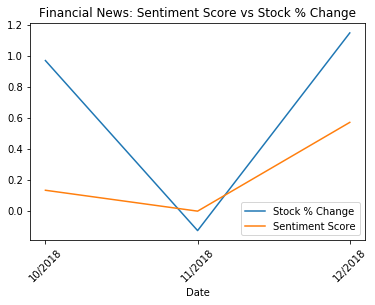

In [184]:
#Plot line graph over a year's time showing stock change and sentiment score.
delta_month_F = FinNewsCombined_df['Delta']
score_month_F = FinNewsCombined_df['sentiment_score']
date = FinNewsCombined_df['month']

plt.plot(date,delta_month_F)
plt.plot(date,score_month_F)
plt.xticks(rotation=45)
plt.title("Financial News: Sentiment Score vs Stock % Change")
plt.xlabel("Date")
plt.legend(['Stock % Change','Sentiment Score'])
plt.savefig("Financial News: Sentiment Score vs Stock % Change Line.png")
plt.show()